## PROJECT AKHIR SANBERCODE
> Topik : Air Pollution

## IMPORT LIBRARIES

In [1]:
# database connector

import sqlite3
from sqlite3 import Error

# data wrangling

import numpy as np
import pandas as pd
import pandasql as psql
import re

# data visualization

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import nltk

## KONEKSI DATABASE

In [2]:
# membuat function untuk connect ke database

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [3]:
# koneksi ke database

conn = create_connection('cahyaputera.db')
cursor = conn.cursor()

## PERSIAPAN DATA

In [4]:
# extract user table

conn_user    = cursor.execute("""select * from User""")
columns_user = [i[0] for i in conn_user.description]
data_user    = conn_user.fetchall()

In [5]:
# transform user table ke dataframe

df_user = pd.DataFrame(data_user, columns = [i for i in columns_user])

In [6]:
# cek data dataframe user

df_user.head()

,userid,name,screenname,location,acccreated,follower,friend,verified
0,1041585792416538624,ana_captures,Anastasia 👑🍀🌸🍃🌏,"London, England",2018-09-17T07:12:59.000Z,1958,2298,0
1,786565830771249152,CleanArctic,CleanArcticAlliance,Arctic,2016-10-13T13:54:42.000Z,1981,4836,0
2,1288084518864216064,RebeL45_,रᴇʙᴇﾚ⁴⁵,HINDUstan,2020-07-28T12:11:09.000Z,240,125,0
3,1113458965550125056,Staci__Rubin,Staci Rubin,"Massachusetts, USA",2019-04-03T15:11:19.000Z,435,214,0
4,812303420505882624,SaveMNMine,Iron Man,BWCA,2016-12-23T14:26:42.000Z,4871,5208,0


In [7]:
# extract tweet table

conn_tweet    = cursor.execute("""select * from Tweet""")
columns_tweet = [i[0] for i in conn_tweet.description]
data_tweet    = conn_tweet.fetchall()

In [8]:
# transform tweet table ke dataframe

df_tweet = pd.DataFrame(data_tweet, columns = [i for i in columns_tweet])

In [9]:
# cek data dataframe tweet

df_tweet.head()

,tweetid,userid,createddate,tweet,cleantweet,scraping_id
0,1329790611520712705,1041585792416538624,2020-11-20T14:16:02.000Z,"RT @IPBES: 🐙""Due to major pressures on coasts ...",rt due major pressures coasts incl water pollu...,1
1,1329790608999915520,786565830771249152,2020-11-20T14:16:02.000Z,Check out this big monster tweet thread on som...,check big monster tweet thread good news appro...,1
2,1329790581598351360,1288084518864216064,2020-11-20T14:15:55.000Z,RT @OpIndia_com: Congress President Sonia Gand...,rt com congress president sonia gandhi accompa...,1
3,1329790579467821064,1113458965550125056,2020-11-20T14:15:55.000Z,HOV lanes move more people in fewer vehicles. ...,hov lanes move people fewer vehicles improve a...,1
4,1329790555438657537,812303420505882624,2020-11-20T14:15:49.000Z,RT @Unitedminingal: .@StrommenSarah .@mndnr If...,rt loses dam permit falls failure include pert...,1


In [10]:
# extract scraping table

conn_scrap    = cursor.execute("""select * from Lastscraping""")
columns_scrap = [i[0] for i in conn_scrap.description]
data_scrap    = conn_scrap.fetchall()

In [11]:
# transform scraping table ke dataframe

df_scrap = pd.DataFrame(data_scrap, columns = [i for i in columns_scrap])

In [12]:
# cek data dataframe scraping

df_scrap.head()

,scraping_id,last_scrape,status
0,1,2020-11-20 22:14:07.779819,0
1,1,2020-11-20 22:14:07.779819,0
2,1,2020-11-20 22:14:07.779819,0
3,1,2020-11-20 22:14:07.779819,0
4,1,2020-11-20 22:14:07.779819,0


In [13]:
# membuat query untuk join seluruh table

query = """
WITH cte1 AS(
SELECT * FROM df_user
), cte2 AS(
SELECT * FROM df_tweet
), cte3 AS(
SELECT * FROM df_scrap
), cte4 AS(
SELECT * 
FROM cte1 
JOIN cte2 ON cte1.userid = cte2.userid 
JOIN cte3 ON cte2.scraping_id = cte3.scraping_id
GROUP BY cte1.userid
)
SELECT 
userid AS [user_id], tweetid AS [tweet_id], name AS [user_name], follower AS [user_follower], friend AS [user_following], verified,
acccreated AS [user_acc_created], location AS [user_location], createddate AS [tweet_created], tweet, cleantweet AS [cleaned_tweet], 
last_scrape AS [scraping_date]
FROM cte4
"""

In [14]:
# membuat master dataframe dari query

df = psql.sqldf(query)

In [15]:
# cek data master table

df.head()

,user_id,tweet_id,user_name,user_follower,user_following,verified,user_acc_created,user_location,tweet_created,tweet,cleaned_tweet,scraping_date
0,14132290,1331980922154082305,mwt2008,5616,5756,0,2008-03-12T14:09:56.000Z,Chorley Lancashire UK,2020-11-26T15:19:33.000Z,RT @UniSurreyNews: Our Global Centre for Clean...,rt global centre clean air research working he...,2020-11-27 23:14:55.878002
1,14198158,1332347099040669698,topcat37,1250,3194,0,2008-03-22T17:49:22.000Z,Texas,2020-11-27T15:34:36.000Z,RT @TexasObserver: .@Earthworks has sent the T...,rt sent texas commission environmental quality...,2020-11-28 15:20:27.605426
2,14279598,1331980413720530947,dinodaizovi,38783,1,0,2008-04-02T01:10:12.000Z,"Brooklyn, New York",2020-11-26T15:17:32.000Z,RT @JessePesta: SCOOP:\nThe owners of least 50...,rt scoop owners least diesel pickups u strippe...,2020-11-27 23:14:55.878002
3,14553885,1331973859734654977,dawnbuie,1198,4552,0,2008-04-27T01:22:09.000Z,toronto,2020-11-26T14:51:29.000Z,RT @JessePesta: SCOOP:\nThe owners of least 50...,rt scoop owners least diesel pickups u strippe...,2020-11-27 23:14:55.878002
4,15021918,1332344932045000704,TexasObserver,64336,3011,1,2008-06-05T19:00:27.000Z,"Austin, TX",2020-11-27T15:26:00.000Z,.@Earthworks has sent the Texas Commission on ...,sent texas commission environmental quality hu...,2020-11-28 15:20:27.605426


In [16]:
# cek info pada master dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           611 non-null    int64 
 1   tweet_id          611 non-null    int64 
 2   user_name         611 non-null    object
 3   user_follower     611 non-null    int64 
 4   user_following    611 non-null    int64 
 5   verified          611 non-null    int64 
 6   user_acc_created  611 non-null    object
 7   user_location     436 non-null    object
 8   tweet_created     611 non-null    object
 9   tweet             611 non-null    object
 10  cleaned_tweet     610 non-null    object
 11  scraping_date     611 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.4+ KB


> Dari data `info()` di atas terlihat bahwa ada beberapa *missing values* pada beberapa kolom, yaitu **user_location** dan **cleaned_tweet**. Selain itu jika kita perhatikan terdapat kolom yang belum memiliki data type seperti yang seharusnya, misalnya **user_acc_created, tweet_created**, dan **scraping_date** yang seharusnya berupa tanggal, serta **user_id, tweet_id, scraping_id** dan **verified** yang seharusnya berupa object.

## PREPROCESSING

In [17]:
# memperbaiki data type pada master dataframe

date = ['user_acc_created', 'tweet_created', 'scraping_date']
objt = ['user_id', 'tweet_id', 'scraping_id', 'verified'] 

for i in df:
    if i in date:
        df[i] = pd.to_datetime(df[i])
    elif i in objt:
        df[i] = df[i].astype(np.object)

In [18]:
# memperbaiki missing value pada user_location

print(f"Terdapat {df['user_location'].isna().sum()} missing values pada kolom user_location")

Terdapat 175 missing values pada kolom user_location


> Terdapat 175 missing values pada kolom ini. Sepertinya memang user tidak mencantumkan lokasi pada keterangan twitternya. Jika seperti ini yang terjadi maka wajar apabila kolom ini memiliki banyak missing values. Maka saya akan mengisi missing value pada kolom ini menjadi *unknown*. Sehingga dengan demikian data akan bersih, dan masih memiliki makna yang sama.

In [19]:
# memperlihatkan data yang kosong pada kolom user_location

df[df['user_location'].isna()].head()

,user_id,tweet_id,user_name,user_follower,user_following,verified,user_acc_created,user_location,tweet_created,tweet,cleaned_tweet,scraping_date
8,16195103,1332348298246537217,carsinogenic,804,3219,0,2008-09-09 00:50:11+00:00,None,2020-11-27 15:39:22+00:00,RT @tanmay_shinde99: #ClimateStrikeOnline\nWe ...,rt shinde climatestrikeonline need climate act...,2020-11-28 15:20:27.605426
13,17175294,1331587182751047680,beemoh,338,398,0,2008-11-05 01:01:53+00:00,None,2020-11-25 13:14:58+00:00,RT @GeorgeMonbiot: The Pollution Paradox expla...,rt pollution paradox explains lot state damagi...,2020-11-25 20:26:07.549303
14,17220707,1331588294833025024,david_bott,3017,1398,0,2008-11-06 22:08:49+00:00,None,2020-11-25 13:19:23+00:00,Great website but what do they actually do to ...,great website actually make tyres sustainable ...,2020-11-25 20:26:07.549303
15,17652531,1329790449289220100,malikgp,694,1266,0,2008-11-26 16:02:58+00:00,None,2020-11-20 14:15:24+00:00,@dl_darkmagick The fact that you refuse to see...,darkmagick fact refuse see terrible record env...,2020-11-20 22:14:07.779819
24,21150492,1331973144991690752,JunkScience,33440,89,1,2009-02-18 00:19:07+00:00,None,2020-11-26 14:48:39+00:00,A couple points:\n\n1. Nothing that comes out ...,couple points nothing comes tailpipe kills any...,2020-11-27 23:14:55.878002


In [20]:
# impute missing value pada kolom user_location

df['user_location'] = df['user_location'].fillna('unknown')

In [21]:
# memeriksa hasil imputation

print(f"Terdapat {df['user_location'].isna().sum()} missing values pada kolom user_location")

Terdapat 0 missing values pada kolom user_location


In [22]:
# memperbaiki missing value pada cleaned_tweet

print(f"Terdapat {df['cleaned_tweet'].isna().sum()} missing values pada kolom cleaned_tweet")

Terdapat 1 missing values pada kolom cleaned_tweet


In [23]:
# memperlihatkan data yang kosong pada kolom cleaned_tweet

df[df['cleaned_tweet'].isna()].head()

,user_id,tweet_id,user_name,user_follower,user_following,verified,user_acc_created,user_location,tweet_created,tweet,cleaned_tweet,scraping_date
493,1177534806021693441,1331971686250414081,TheDepthNews,126,20,0,2019-09-27 10:46:15+00:00,"New Delhi, India",2020-11-26 14:42:51+00:00,प्रदूषण के कारण हो सकती हैं ये त्वचा संंबंधी प...,None,2020-11-27 23:14:55.878002


> Sepertinya missing values pada data ini di akibatkan karena tweet berasal dari bahasa India, sehingga pada saat dilakukan cleaning mungkin saja dianggap simbol atau semacamnya sehingga tidak ada yang tersisa pada **cleaned_tweet** ketika di lakukan pembersihan. Cara pembersihannya adalah dengan di drop, agar nantinya mempermudah modelling. Selain itu row ini hanya 1 dari total 611 data, sehingga porsinya setelah di drop tentu tidak akan merubah hasil akhirnya nanti.

In [24]:
# drop seluruh missing value

df.dropna(inplace=True)

In [25]:
# memeriksa hasil drop

print(f"Terdapat {df['cleaned_tweet'].isna().sum()} missing values pada kolom cleaned_tweet")

Terdapat 0 missing values pada kolom cleaned_tweet


In [26]:
# memeriksa hasil preprocessing

df.isna().sum()

user_id             0
tweet_id            0
user_name           0
user_follower       0
user_following      0
verified            0
user_acc_created    0
user_location       0
tweet_created       0
tweet               0
cleaned_tweet       0
scraping_date       0
dtype: int64

In [27]:
# membuat fungsi untuk menganalisis sentiment

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0 :
        return 'positive'
    elif analysis.sentiment.polarity == 0 :
        return 'neutral'
    else :
        return 'negative'

In [28]:
# analisis sentiment pada cleaned_tweet

sentiment = []
for i in df['cleaned_tweet']:
    sentiment.append(analyze_sentiment(i))

In [29]:
# membuat kolom sentiment pada master dataframe

df['sentiment'] = sentiment

In [30]:
# memeriksa info setelah preprocessing

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 0 to 610
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   user_id           610 non-null    object             
 1   tweet_id          610 non-null    object             
 2   user_name         610 non-null    object             
 3   user_follower     610 non-null    int64              
 4   user_following    610 non-null    int64              
 5   verified          610 non-null    object             
 6   user_acc_created  610 non-null    datetime64[ns, UTC]
 7   user_location     610 non-null    object             
 8   tweet_created     610 non-null    datetime64[ns, UTC]
 9   tweet             610 non-null    object             
 10  cleaned_tweet     610 non-null    object             
 11  scraping_date     610 non-null    datetime64[ns]     
 12  sentiment         610 non-null    object             
dtypes: da

> Setelah data di bersihkan, di bawah ini akan mulai di lakukan *analisis dan explorasi data*.

## ANALISIS DATA

In [31]:
# statistik deskriptif untuk data numerikal

df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_follower,610.0,23195.663934,330383.306381,0.0,114.75,577.0,2009.5,7814875.0
user_following,610.0,1613.008197,4678.044054,0.0,172.00,571.5,1639.0,88246.0


> Dari analisis deskriptif pada data numerikal, dapat terlihat bahwa mean **followers** dari user pada sampel data yang di scrap ini adalah sekitar 23195 orang, dengan standar deviasi 330383 orang. Mediannya adalah 577 orang, minimumnya 0 orang, dan maksimumnya adalah 7,8 juta orang. Sementara rata - rata **following** nya sebanyak 1613 orang, dengan standar deviasi 4678 orang. Mediannya adalah 571 orang, minimumnya 0 orang, dan maksimumnya adalah 88 ribu orang. Jumlah ini sepertinya agak lumayan bervariasi dan aneh. Namun bisa saja hal ini mungkin di karenakan ada beberapa user yang tergolong *influencer* sehingga memiliki basis followers yang sangat banyak, sehingga wajar saja secara statistik mereka sangat mempengaruhi hasil seperti di atas.

In [32]:
# statistik deskriptif untuk data kategorikal

df.describe(include='object').T

,count,unique,top,freq
user_id,610,610,4853640190,1
tweet_id,610,610,1331586884590440450,1
user_name,610,610,CricklewoodMum,1
verified,610,2,0,586
user_location,610,336,unknown,175
tweet,610,455,RT @OpIndia_com: Congress President Sonia Gand...,25
cleaned_tweet,610,452,rt com congress president sonia gandhi accompa...,25
sentiment,610,3,neutral,269


> Sementara itu, analisis deskriptif pada data kategorikal diatas menujukkan bahwa memang **user_id, tweet_id,** dan **user_name**, seluruhnya memiliki *count* dan *unique* yang berjumlah sama. Artinya pada ketiga kolom tersebut tidak memiliki data yang berulang, sehingga memang di pastikan seluruh values pada kolom - kolom ini adalah data yang *unik* atau *berbeda*. 

> Sebaliknya terdapat *2 unique* pada kolom **verified** yang menandakan bahwa hanya terdapat 2 values, yaitu *0 dan 1*, 1 menandakan bahwa user tersebut verified user, dan 0 bukan. Menariknya, dari kolom ini sangat terlihat bahwa banyak sekali user yang merupakan verified user, yaitu sebanyak 24 orang (610 - 586 orang). Yang mungkin saja bisa mempengaruhi hasil pada analisis deskriptif sebelumnya (follower dan following).

> Pada **user_location** yang menandakan lokasi user, terdapat 336 lokasi yang berbeda, namun memang kebanyakan adalah *unknown* sebanyak 175 kali. Pada **tweet dan cleaned_tweet** dapat dilihat bahwa masih terdapat banyak *retweet*. Sementara pada **sentiment**, kebanyakan adalah *neutral sentiment*.

#### VERIFIED USER VS NOT VERIFIED

In [33]:
# dataframe verified user

ver   = df[df['verified']==1]

# dataframe unverified user

unver = df[df['verified']==0]

In [34]:
# statistik deskriptif untuk data numerikal pada verified user

ver.describe().T

,count,mean,std,min,25%,50%,75%,max
user_follower,24.0,518486.708333,1.618938e+06,9810.0,17457.50,28579.5,104536.75,7814875.0
user_following,24.0,1605.208333,2.343812e+03,12.0,123.25,651.0,2094.00,10509.0


> Memang apabila di perhatikan, melalui analisis deskriptif pada verified user diatas dapat di lihat bahwa memang secara keseluruhan, baik **follower** maupun **following** sangat di pengaruhi oleh verified user. Terlihat pada unverified user dibawah, rata - rata, standar deviasi, minimum, median, dan maksimum pada kolom - kolom ini sangat jauh jika di bandingkan dengan keseluruhan data di awal tadi.

In [35]:
# statistik deskriptif untuk data numerikal pada unverified user

unver.describe().T

,count,mean,std,min,25%,50%,75%,max
user_follower,586.0,2910.706485,10421.261966,0.0,101.00,509.0,1810.75,142220.0
user_following,586.0,1613.327645,4750.360050,0.0,173.25,571.5,1633.75,88246.0


In [36]:
# statistik deskriptif untuk data kategorikal pada verified user

ver.describe(include='object').T

,count,unique,top,freq
user_id,24,24,21150492,1
tweet_id,24,24,1329789722240094211,1
user_name,24,24,livemint,1
verified,24,1,1,24
user_location,24,22,India,2
tweet,24,21,RT @htTweets: #HTLS2020 | Delhi government is ...,4
cleaned_tweet,24,21,rt htls delhi government taking steps end air ...,4
sentiment,24,3,positive,13


> Secara singkat dapat terlihat jelas bahwa memang dari jumlah tweet dan retweet nya pada unverified user memiliki jumlah yang sangat banyak, jauh melebihi verified user. Berarti kita dapat simpulkan bahwa memang terdapat tweet dari verified user yang di retweet berulang kali oleh unverified user. Dan jika kita lihat pada hasil sentimentnya, golongan verified user banyak memberikan *positive sentiment*. Sementara unverified user banyak memberikan *neutral sentiment*.

In [37]:
# statistik deskriptif untuk data kategorikal pada unverified user

unver.describe(include='object').T

,count,unique,top,freq
user_id,586,586,4853640190,1
tweet_id,586,586,1329789743190528002,1
user_name,586,586,CricklewoodMum,1
verified,586,1,0,586
user_location,586,322,unknown,173
tweet,586,438,RT @OpIndia_com: Congress President Sonia Gand...,25
cleaned_tweet,586,435,rt com congress president sonia gandhi accompa...,25
sentiment,586,3,neutral,262


## VISUALISASI DATA

### VERIFIED VS UNVERIFIED USER ?

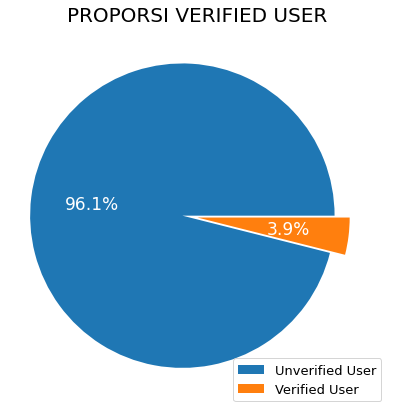

In [38]:
# pie plot untuk verified dan unverified

labels = 'Unverified User', 'Verified User'

plt.figure(figsize = (8,7))
plt.title('PROPORSI VERIFIED USER', fontsize = 20)

plt.pie(df['verified'].value_counts(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

> Melalui visualisasi diatas dapat terlihat bahwa proporsi *verified user* hanya sekitar 3.9% dari total keseluruhan data. Walaupun demikian, kita dapat lihat melalui analisis dekriptif yang di lakukan sebelumnya, verified user sepertinya sangat berpengaruh terhadap opini dari unverified user (tergolong influencer), sehingga terlihat dari jumlah retweet yang di dapatkan.

### USER LOCATION

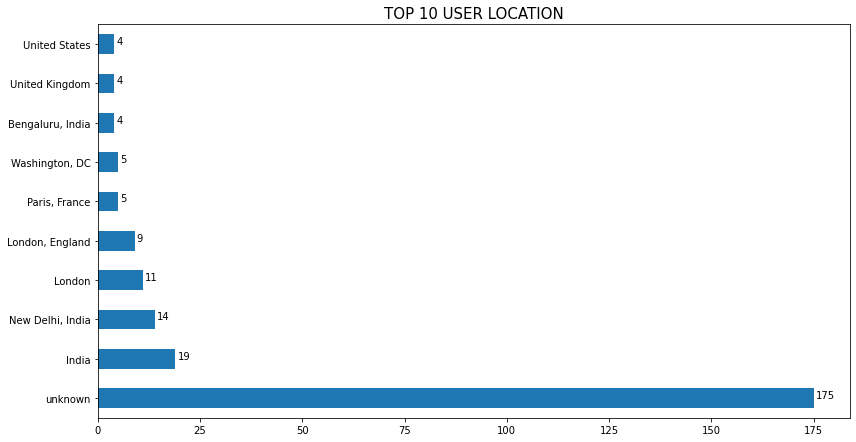

In [39]:
# visualisasi user location

loc = df['user_location'].value_counts().head(10)

plt.figure(figsize=(12,6))
ax = loc.plot(kind = 'barh')
plt.tight_layout()

for i, j in enumerate(loc):
    ax.text(j + 0.5, i, str(j))
    
plt.title('TOP 10 USER LOCATION', fontsize=15)

plt.show()

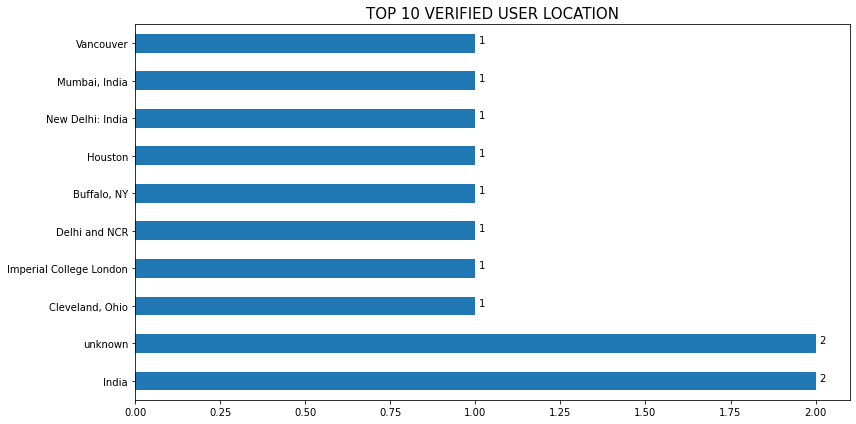

In [40]:
# visualisasi user location pada verified

loc = df[df['verified']==1]['user_location'].value_counts().head(10)

plt.figure(figsize=(12,6))
ax = loc.plot(kind = 'barh')

for i, j in enumerate(loc):
    ax.text(j + 0.01, i, str(j))
    
plt.title('TOP 10 VERIFIED USER LOCATION', fontsize=15)
plt.tight_layout()
plt.show()

> Melalui eksplorasi dan visualisasi ketiga kategori pada data diatas, dapat di simpulkan bahwa secara keseluruhan memang banyak sekali user yang tidak mencantumkan lokasinya, sehingga kebanyakan dari lokasi mereka adalah *unknown*. Serta banyak dari mereka yang *unknown* ini merupakan *unverified user*, jika selain dari itu *India* merupakan lokasi yang terbanyak dari user.

### FOLLOWER DAN FOLLOWING

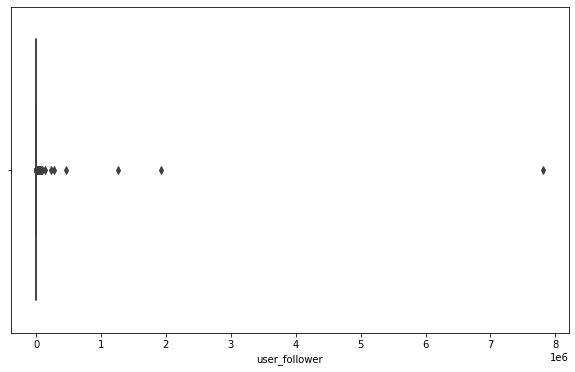

In [41]:
# visualisasi user follower

plt.figure(figsize=(10,6))
sns.boxplot(df['user_follower'])
plt.show()

> Melalui visualisasi `boxplot()` diatas, dapat di temukan bahwa memang terdapat banyak *outlier*, dan melalui visualisasi di bawah terlihat bahwa outlier ini berasal dari *verified user* (influencer).

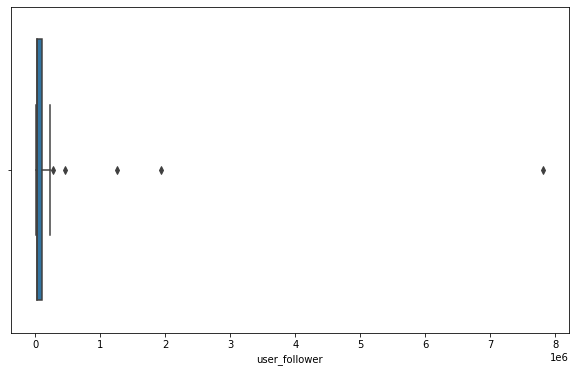

In [42]:
# visualisasi verified user follower

plt.figure(figsize=(10,6))
sns.boxplot(df[df['verified']==1]['user_follower'])
plt.show()

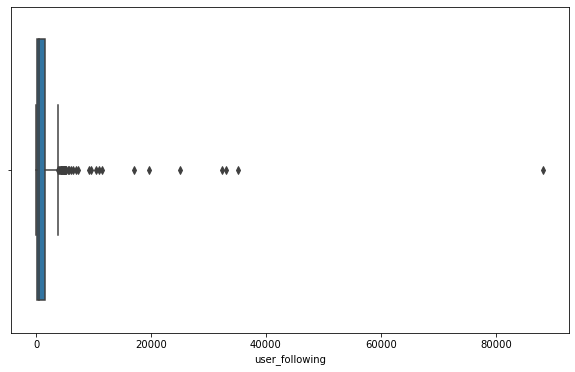

In [43]:
# visualisasi user following

plt.figure(figsize=(10,6))
sns.boxplot(df['user_following'])
plt.show()

> Hal yang sama juga terjadi pada **following**, dapat di temukan bahwa memang terdapat banyak *outlier*, namun tidak seperti pada boxplot pertama, outlier pada following ini berasal dari *unverified user*.

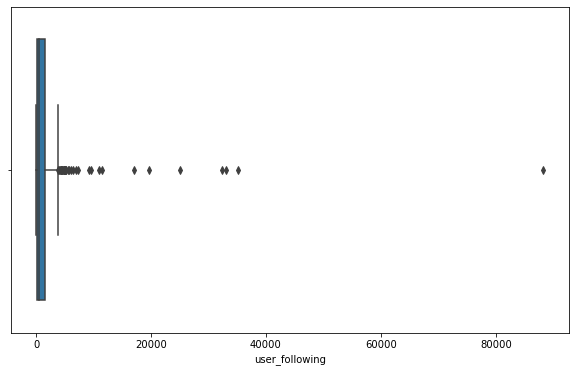

In [44]:
# visualisasi unverified user follower

plt.figure(figsize=(10,6))
sns.boxplot(df[df['verified']==0]['user_following'])
plt.show()

### HARI DAN WAKTU

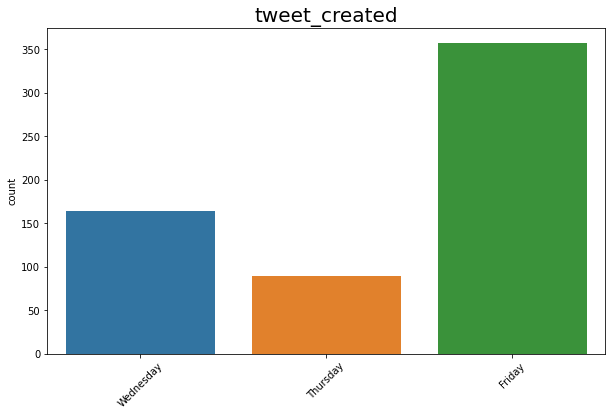

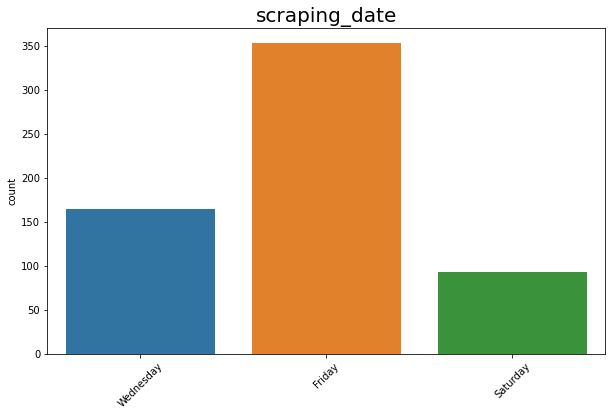

In [45]:
# visualisasi tweet dan account per hari

m = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i in df[['tweet_created', 'scraping_date']]:
    plt.figure(figsize = (10,6))
    plt.title(f'{i}', fontsize=20)
    sns.countplot(sorted(df[i].dt.day_name(), key = m.index))
    plt.xticks(rotation=45)
    plt.show()

> Karena memang scraping lebih banyak dilakukan pada hari jumat, terlihat data tweet terbanyak menunjukkan pada hari jumat, sedangkan untuk masalah waktu di buat, kebanyakan tweet di buat pada pukul 14 siang, walaupun scraping di lakukan pada waktu malam hari pukul 22.

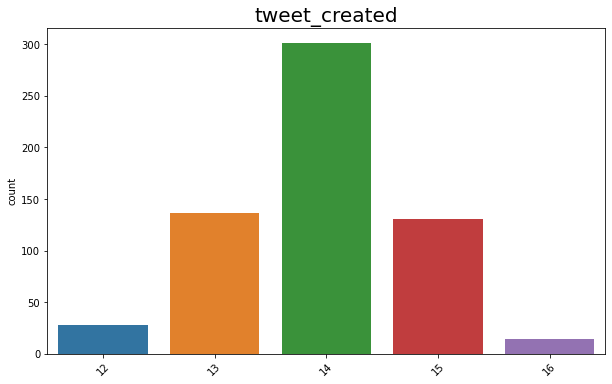

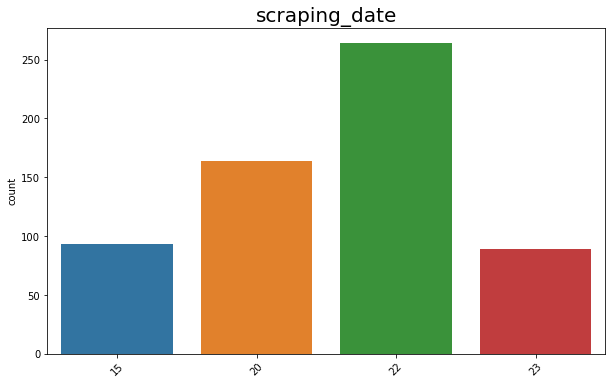

In [46]:
# visualisasi waktu tweet dibuat

for i in df[['tweet_created', 'scraping_date']]:
    plt.figure(figsize = (10,6))
    plt.title(f'{i}', fontsize=20)
    sns.countplot(sorted(df[i].dt.hour))
    plt.xticks(rotation=45)
    plt.show()

### TWEET TERBANYAK

In [47]:
# menghilangkan rt (retweet)

remove = re.compile(r'rt')

df['cleaned_tweet'] = [remove.sub('', i) for i in df['cleaned_tweet']]

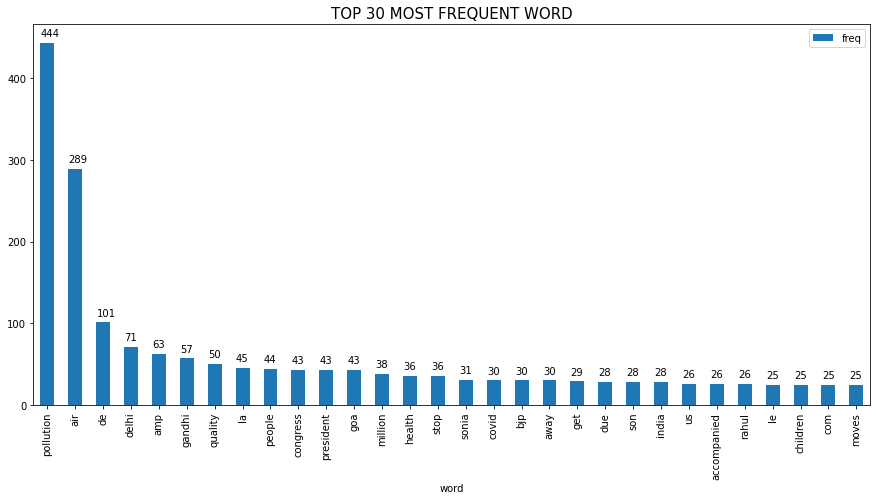

In [48]:
# visualisasi tweet

cv = CountVectorizer()
words = cv.fit_transform(df['cleaned_tweet'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

ax = frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7))

for i in ax.patches:
        ax.annotate('{}'.format(i.get_height()), (i.get_x()+0.01, i.get_height()+8))

plt.title("TOP 30 MOST FREQUENT WORD", fontsize=15)
plt.show()

> Pada visualisasi tweet di atas, terlihat topik **pollution** dan **air** merupakan kata yang sering muncul dalam tweet dari seluruh user. Ini terlihat pada visualisasi wordcloudnya di bawah.

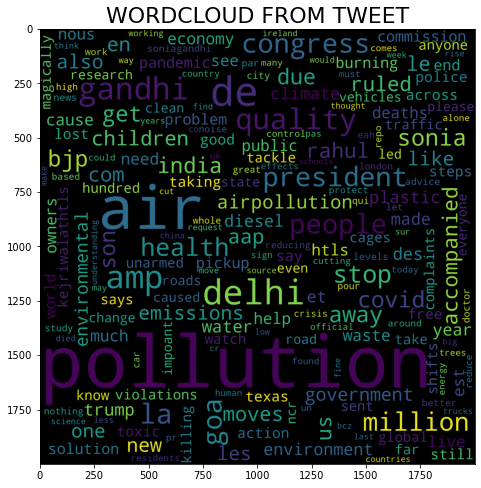

In [49]:
# visualisasi wordcloud

wordcloud = WordCloud(width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WORDCLOUD FROM TWEET", fontsize = 22)
plt.show()

> Selanjutnya akan di lakukan analisis sentimen untuk melihat kata yang sering muncul pada tweet dari user, baik positif, netral, maupun negatif. Tetapi sebelumnya akan di hilangkan dulu kata *air dan pollution* supaya dapat diketahui kata yang sebenarnya.

In [50]:
# menghilangkan air dan pollution

remove = re.compile(r'(air|pollution)')

df['cleaned_tweet'] = [remove.sub('', i) for i in df['cleaned_tweet']]

### ANALISIS SENTIMEN - POSITIF

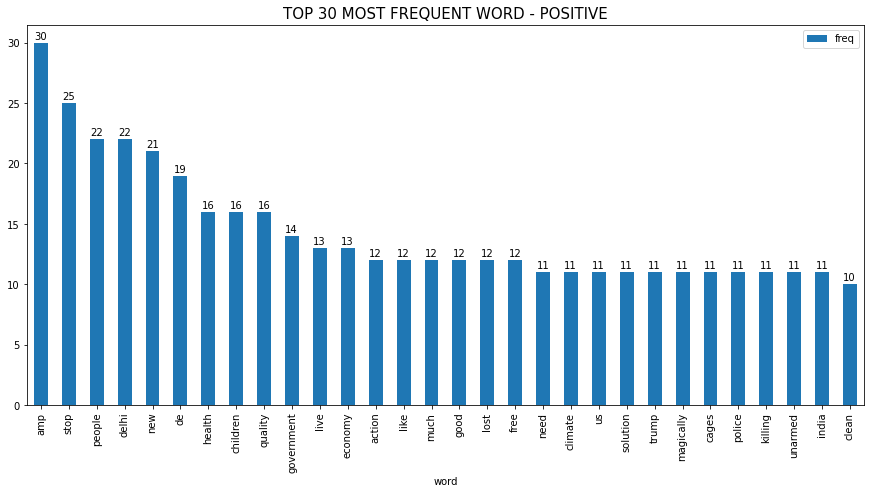

In [51]:
# visualisasi tweet positif

cv = CountVectorizer()
words = cv.fit_transform(df['cleaned_tweet'][df['sentiment'] == 'positive'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

ax = frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7))

for i in ax.patches:
        ax.annotate('{}'.format(i.get_height()), (i.get_x()+0.01, i.get_height()+0.3))

plt.title("TOP 30 MOST FREQUENT WORD - POSITIVE", fontsize=15)
plt.show()

> Setelah di lakukan pembersihan, kata yang muncul adalah : *stop, people, delhi, health*, dst. Ini di visualiasikan melalui wordcloud di bawah.

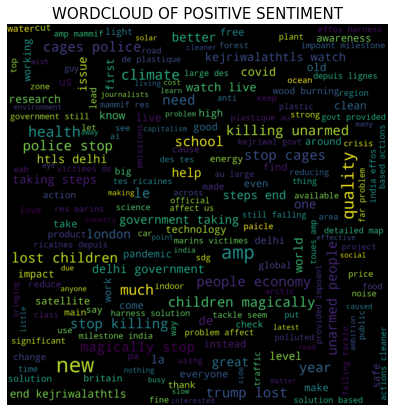

In [52]:
# visualisasi wordcloud positif

positive_words =' '.join([i for i in df['cleaned_tweet'][df['sentiment'] == 'positive']])

wordcloud = WordCloud(width=2000, height=2000, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('WORDCLOUD OF POSITIVE SENTIMENT', fontsize=15)
plt.show()

### ANALISIS SENTIMEN - NETRAL

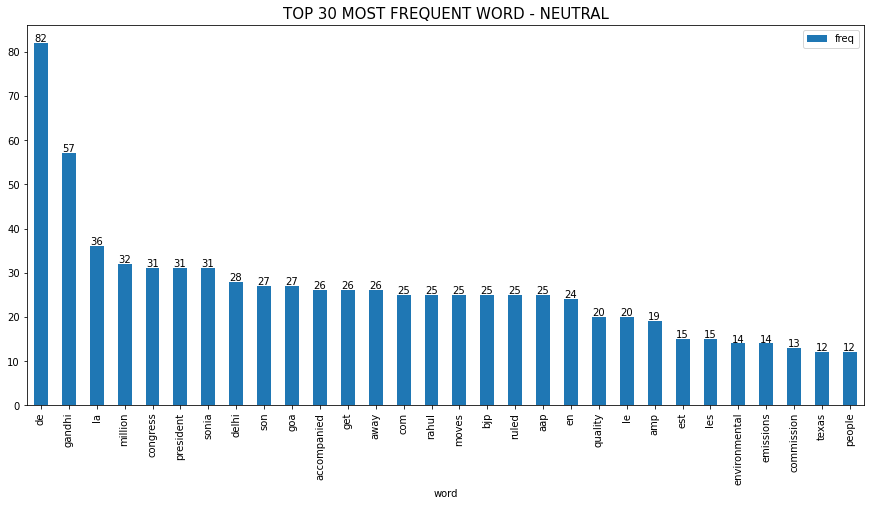

In [53]:
# visualisasi tweet netral

cv = CountVectorizer()
words = cv.fit_transform(df['cleaned_tweet'][df['sentiment'] == 'neutral'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

ax = frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7))

for i in ax.patches:
        ax.annotate('{}'.format(i.get_height()), (i.get_x()+0.01, i.get_height()+0.3))

plt.title("TOP 30 MOST FREQUENT WORD - NEUTRAL", fontsize=15)
plt.show()

> Sementara itu, pada kata yang cenderung netral di peroleh kata - kata seperti : *gandhi, million, president, sonia, goa*. Mengingat data terbanyak berasal dari user India, masuk akal apabila kata - kata ini yang muncul. Visualisasi word cloud di bawah.

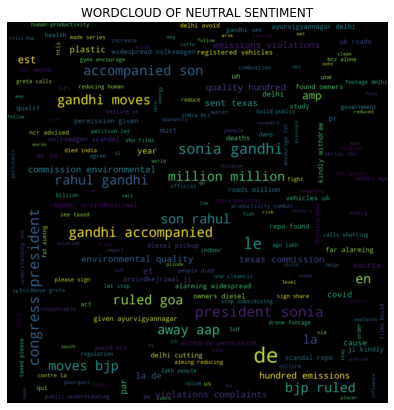

In [54]:
# visualisasi wordcloud netral

positive_words =' '.join([i for i in df['cleaned_tweet'][df['sentiment'] == 'neutral']])

wordcloud = WordCloud(width=2000, height=2000, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('WORDCLOUD OF NEUTRAL SENTIMENT')
plt.show()

### ANALISIS SENTIMEN - NEGATIF

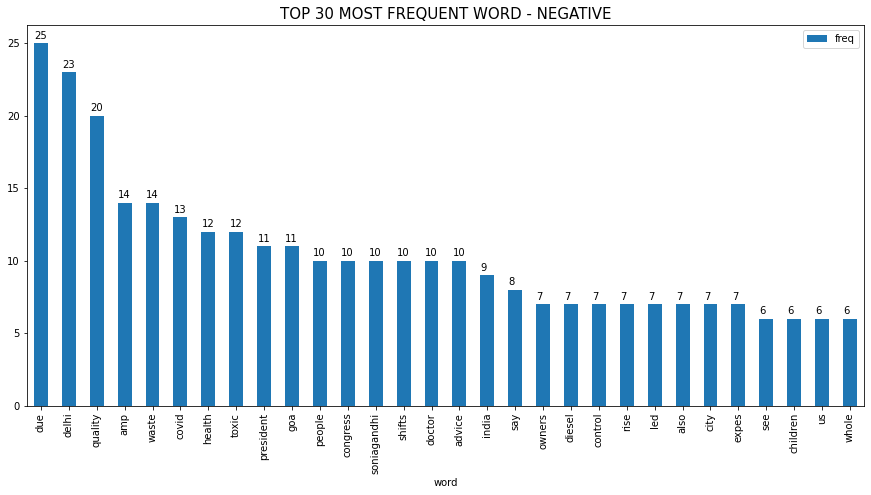

In [55]:
# visualisasi tweet negatif

cv = CountVectorizer()
words = cv.fit_transform(df['cleaned_tweet'][df['sentiment'] == 'negative'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

ax = frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7))

for i in ax.patches:
        ax.annotate('{}'.format(i.get_height()), (i.get_x()+0.01, i.get_height()+0.3))

plt.title("TOP 30 MOST FREQUENT WORD - NEGATIVE", fontsize=15)
plt.show()

> Pada sentimen negatif, terlihat bahwa ada kata yang berulang seperti : *delhi, president, soniagandhi*. Visualisasi wordcloud di bawah.

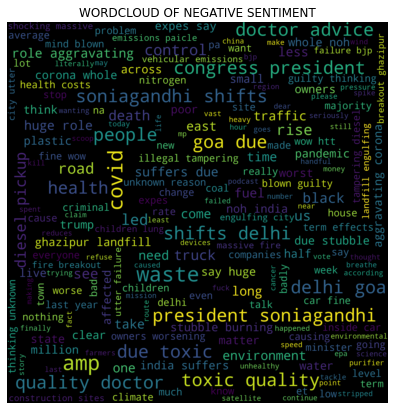

In [56]:
# visualisasi wordcloud negatif

positive_words =' '.join([i for i in df['cleaned_tweet'][df['sentiment'] == 'negative']])

wordcloud = WordCloud(width=2000, height=2000, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('WORDCLOUD OF NEGATIVE SENTIMENT')
plt.show()

### HASHTAG

In [57]:
# fungsi untuk menarik hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [58]:
# extract hashtags 

HT = sum(hashtag_extract(df['tweet']), [])

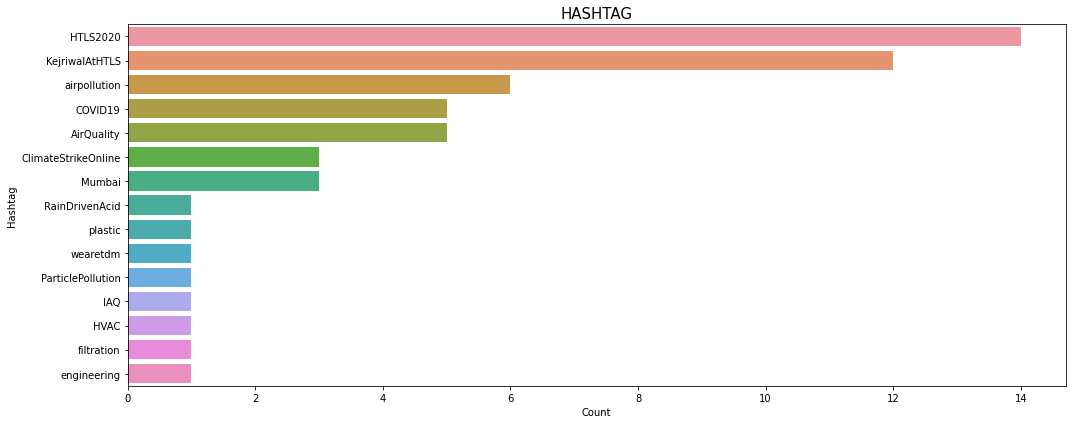

In [59]:
# visualisasi hashtag positif

hashtag   = nltk.FreqDist(HT)
data_hash = pd.DataFrame({'Hashtag': list(hashtag.keys()),
                         'Count': list(hashtag.values())})

pos = data_hash.head(15).sort_values('Count', ascending=False)

plt.figure(figsize=(15,6))
ax = sns.barplot(data=pos, y="Hashtag", x="Count")

plt.title('HASHTAG', fontsize=15)
plt.tight_layout()
plt.show()

> Melalui penelusuran hashtag dapat di temukan bahwa sebagian besar hashtag memang berasal dari india, seperti *HTLS2020* yang merupakan singkatan dari *Hindustan Times Leadership Summit*, yaitu acara pertemuan petinggi India yang di selenggarakan oleh *Hindustan Times* salah satu surat kabar di India. Di bawah ini adalah jumlah dari masing - masing hashtagnya.

In [60]:
# data hashtag

data_hash.sort_values(by='Count', ascending=False).head(15)

,Hashtag,Count
30,pollution,21
16,AirPollution,15
3,HTLS2020,14
4,KejriwalAtHTLS,12
29,Delhi,12
28,SoniaGandhi,10
31,D,9
63,Pollution,7
15,ArvindKejriwal,6
6,airpollution,6


## KESIMPULAN 

> Memang setelah di perhatikan lagi, walaupun setelah di set scraping ke *Worldwide*, terlihat bahwa topik yang diambil, yaitu : **AIR POLLUTION** merupakan issue yang sedang marak di perbincangkan di India, terlihat dari lokasi, visualisasi tweet, serta hashtag yang ada pada data ini. 

> Selanjutnya, melalui analisis deskriptif pada data numerikal, dapat terlihat bahwa mean **followers** dari user pada sampel data adalah sekitar 23195 orang, dengan rata - rata **following** nya sebanyak 1613. Jumlah ini di karenakan ada beberapa user yang tergolong *influencer* sehingga memiliki basis followers yang sangat banyak, sehingga wajar saja secara statistik mereka sangat mempengaruhi hasil seperti dilihat pada visualisasi `boxplot()` di atas walaupun jika di lihat melalui pie chart hanya sebesar 3.9%.

> Selain itu, pada analisis deskriptif data kategorikal menujukkan bahwa memang **user_id, tweet_id,** dan **user_name**, seluruhnya memiliki *count* dan *unique* yang berjumlah sama. Artinya pada ketiga kolom tersebut tidak memiliki data yang berulang, sehingga memang di pastikan seluruh values pada kolom - kolom ini adalah data yang *unik* atau *berbeda*. Dari sini juga terlihat sebarannya, yaitu ada sekitar 24 orang influencer, yang pada akhirnya tweet dari mereka ini yang kebanyakan di retweet oleh unverified user.

> Kata yang berulang muncul adalah : *sonia, gandhi, president, delhi* yang merujuk pada *Sonia Gandhi, President dari Indian National Congress* yang sedang dalam perawatan karena terpapar covid, sehingga menurut artikel berita ini : https://www.hindustantimes.com/india-news/poor-air-quality-forces-sonia-gandhi-to-shift-out-of-delhi-on-doctors-advice/story-4OzCCg8sQIUHi9u0f6OwYJ.html beliau harus di bawa keluar dari kota *Delhi* karena buruknya kualitas udara di kota tersebut. Sehingga menjadi wajar apabila issue **AIR POLLUTION** ini kembali marak dan di perbincangkan di India baru - baru ini.

In [61]:
df.to_csv('sanberfinalproject.csv', index=False)